In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/project/movies_review dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df1 = df.sample(1000)

In [ ]:
df1['sentiment'].replace({'positive': 1,'negative': 0},inplace=True)

/tmp/ipython-input-2785512764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['sentiment'].replace({'positive': 1,'negative': 0},inplace=True)
/tmp/ipython-input-2785512764.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['sentiment'].replace({'positive': 1,'negative': 0},inplace=True

In [ ]:
df1.sentiment.value_counts()

,count
sentiment,
0,516
1,484


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1 = df1.drop_duplicates(keep='first')

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.shape

(1000, 2)

In [ ]:
df1.sentiment.value_counts()

,count
sentiment,
0,516
1,484


In [ ]:
df1['reviw_len']=df1.review.apply(len)

In [ ]:
df1['reviw_char']=df1.review.apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1['reviw_sent']=df1.review.apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,review,sentiment,reviw_len,reviw_char,reviw_sent
33658,This is a strong recommendation to anyone who ...,0,738,157,7
7944,"It's dreadful, but ...<br /><br />Cat Stevens ...",0,234,52,1
44819,As a Bruce Campbell fan for nearly two decades...,0,2708,594,15
11111,My friend & I rented this movie and within the...,0,408,93,4
1429,"A good x evil film with tastes of ""James Bond""...",1,902,198,8


In [ ]:
#df1['review'][31938]

In [ ]:
#df1['review'].unique()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer('english')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
  text = text.lower()
  text = re.sub(r'<.*?>', '', text)
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]

  y.clear()

  for i in text:
     if i not in  stopwords.words('english')and i not in string.punctuation:
        y.append(i)

  text = y[:]
  y.clear()

  for i in text:
     y.append(sb.stem(i))

  return " ".join(y)

In [ ]:
#df1['review'].apply(transform_text)

In [ ]:
df1['review'] = df1['review'].apply(transform_text)

In [ ]:
df1['reviw_len'] = df1.review.apply(lambda x:len(x))
df1['reviw_char']=df1.review.apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1

,review,sentiment,reviw_len,reviw_char,reviw_sent
33658,strong recommend anyon read review never seen ...,0,392,67,7
7944,dread cat steven fan given opportun see woman ...,0,112,20,1
44819,bruce campbel fan near two decad thrill opport...,0,1449,234,15
11111,friend rent movi within first 5 min idea go fe...,0,211,38,4
1429,good x evil film tast jame bond romeo juliet m...,1,520,84,8
...,...,...,...,...,...
48949,make thriller witchcraft believ everyth help a...,0,342,52,4
47360,movi lack credibl two reason one mayor major c...,0,857,148,19
28758,rent last night open 2001 ran waaaaaaaaay long...,0,459,78,9
38840,david lynch shot first film sever year ad new ...,1,1434,228,14


In [ ]:
from wordcloud import WordCloud
wc= WordCloud(width=1000 , height=1000 , min_font_size=10 , background_color='white')

In [ ]:
from scipy.interpolate import generate_knots
possitive_wc =wc.generate(df1[df1['sentiment']==1]['review'].str.cat(sep=" "))

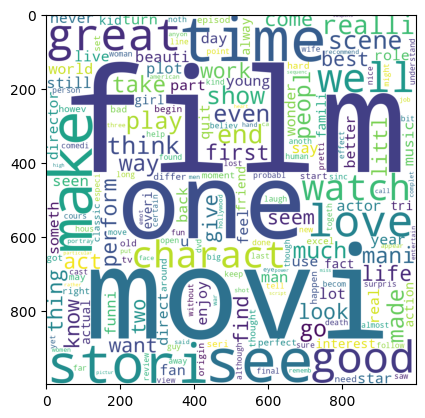

In [ ]:
plt.imshow(possitive_wc)

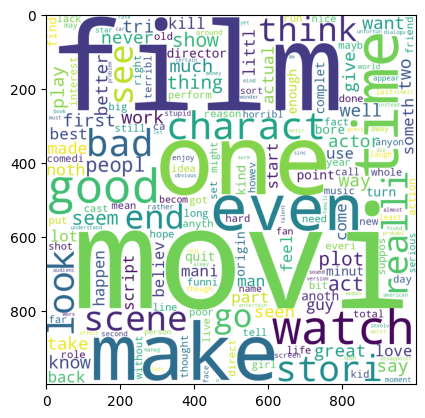

In [ ]:
negetive_wc =wc.generate(df1[df1['sentiment']==0]['review'].str.cat(sep=" "))
plt.imshow(negetive_wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(df1['review']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(1000, 12063)

In [ ]:
y = df1['sentiment'].values
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

In [ ]:
x_train , x_test , y_train , y_test  = train_test_split(x, y , test_size=0.2 , random_state=22)

In [ ]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
def model(model):
  model.fit(x_train , y_train)
  y_pred1 = model.predict(x_test)
  print("accuracy_score :",accuracy_score(y_test , y_pred1))
  print("confusion_matrix :",confusion_matrix(y_test , y_pred1))
  print("precision_score :",precision_score(y_test , y_pred1))
  print(classification_report(y_test, y_pred1))


In [ ]:
model(gnb)

accuracy_score : 0.575
confusion_matrix : [[64 37]
 [48 51]]
precision_score : 0.5795454545454546
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       101
           1       0.58      0.52      0.55        99

    accuracy                           0.57       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      0.57      0.57       200



In [ ]:
text = "Mind-blowing visuals and an emotional father-daughter story. The science is complex but never boring. Hans Zimmer’s score gives goosebumps. A little long, but worth every minute."
textn = "Feels like the franchise is running on fumes. The action is loud but empty, and the plot makes zero sense. Characters magically survive anything, which kills all tension."
textp = "A brilliant mix of action and mind-bending storytelling. Christopher Nolan delivers a visually stunning puzzle that rewards multiple rewatches. DiCaprio’s performance is outstanding."

In [ ]:

text

'brilliant mix action storytel christoph nolan deliv visual stun puzzl reward multipl rewatch dicaprio perform outstand'

In [ ]:
def pre(model , t ):
  text = transform_text(t)
  return model.predict(cv.transform([text]).toarray())

In [ ]:
print(pre(gnb , textn))
print(pre(gnb , textp))

[0]
[0]


In [ ]:
model(bnb)

accuracy_score : 0.775
confusion_matrix : [[92  9]
 [36 63]]
precision_score : 0.875
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       101
           1       0.88      0.64      0.74        99

    accuracy                           0.78       200
   macro avg       0.80      0.77      0.77       200
weighted avg       0.80      0.78      0.77       200



In [ ]:

print(pre(bnb , textn))
print(pre(bnb , textp))

[0]
[1]


In [ ]:
model(mnb)

accuracy_score : 0.78
confusion_matrix : [[85 16]
 [28 71]]
precision_score : 0.8160919540229885
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       101
           1       0.82      0.72      0.76        99

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [ ]:
print(pre(mnb , textn))
print(pre(mnb , textp))

[0]
[1]


Decision Tree Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def pre(model , t ):
  return model.predict(tf.transform([t]).toarray())

In [ ]:
tf = TfidfVectorizer()

In [ ]:
x = tf.fit_transform(df1['review']).toarray()
y = df1['sentiment'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
model(dt)

accuracy_score : 0.68
confusion_matrix : [[61 40]
 [24 75]]
precision_score : 0.6521739130434783
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       101
           1       0.65      0.76      0.70        99

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.69      0.68      0.68       200



In [ ]:
print(pre(dt , textn))
print(pre(dt , textp))

[1]
[1]


In [ ]:
rf = RandomForestClassifier(n_estimators=50 , random_state=22)

In [ ]:
model(rf)

accuracy_score : 0.815
confusion_matrix : [[80 21]
 [16 83]]
precision_score : 0.7980769230769231
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       101
           1       0.80      0.84      0.82        99

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



In [ ]:
print(pre(rf , textn))
print(pre(rf , textp))

[1]
[1]
